In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [19]:
# Set plot style for publication quality
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (14, 10), 'font.size': 16})

plt.rc('font', family='serif')
#plt.rc('xtick', labelsize='large')
#plt.rc('ytick', labelsize='large')

# Load the AirPassengers dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', parse_dates=['Month'], index_col='Month')
# Decompose the time series to identify trend and seasonal components
result = seasonal_decompose(data['Passengers'], model='additive')



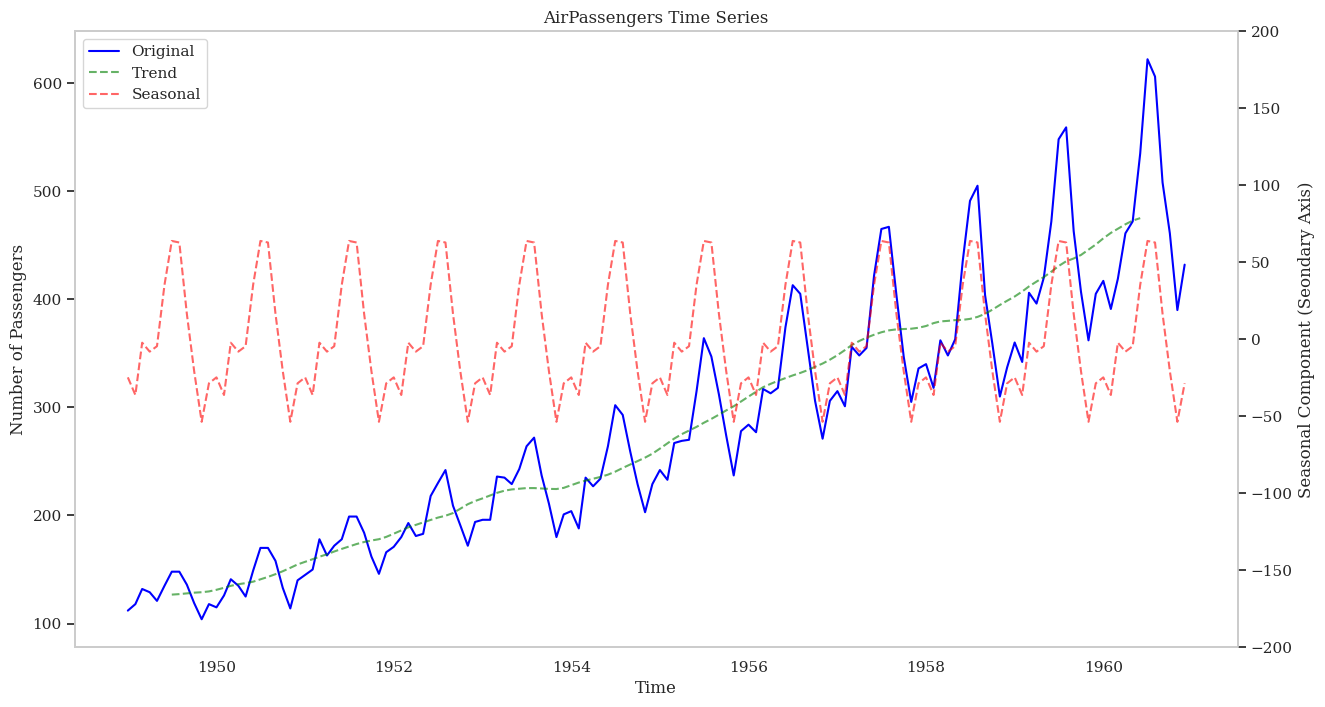

In [20]:
# Plot the original time series with annotations
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(data['Passengers'], label='Original', color='blue')
ax.set_title('AirPassengers Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Passengers')

# beautify plot with font type
ax.plot(result.trend, label='Trend', color='green', alpha=0.6, linestyle='--')

# add seasonal trend on secondary y-axis
ax2 = ax.twinx()
ax2.plot(result.seasonal, label='Seasonal', color='red', alpha=0.6, linestyle='--')
ax2.set_ylabel('Seasonal Component (Seondary Axis)')

# change seoconday axis range from -100 to 100
ax2.set_ylim(-200, 200)

# add legend for both primary and seconday y-axis together
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax2.grid(False)
ax.grid(False)


In [21]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [23]:
train_end = '1959-01-01'
data.reset_index(inplace=True)
train_data = data[data['Month'] <= train_end]['Passengers']
test_data = data[data['Month'] > train_end]['Passengers']

print(train_data.shape)

data
print(test_data.shape)

(121,)
(23,)


# Fit the SARIMA Model

order (iterable or iterable of iterables, optional) – The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters. d must be an integer indicating the integration order of the process, while p and q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. Default is an AR(1) model: (1,0,0).

seasonal_order (iterable, optional) – The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity. d must be an integer indicating the integration order of the process, while p and q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. s is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data or 12 for monthly data. Default is no seasonal effect.


In [26]:
# Find Order
# https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html
Sarimax_model = auto_arima(train_data,
                       start_P=1,
                       start_q=1,
                       max_p=6,
                       max_q=6,
                       max_P=6,
                       max_Q=6,
                       m=12,
                       seasonal=True,
                       d=None,
                       D=None,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=917.887, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=818.855, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=867.468, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1069.657, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=817.716, Time=0.07 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=818.942, Time=0.15 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=820.500, Time=0.46 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=817.302, Time=0.08 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=818.826, Time=0.25 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=818.916, Time=0.17 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=817.916, Time=0.13 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=818.402, Time=0.14 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  121
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -404.651
Date:                            Wed, 17 Jul 2024   AIC                            817.302
Time:                                    00:24:07   BIC                            828.067
Sample:                                         0   HQIC                           821.668
                                            - 121                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.8092      1.980      2.429      0.015       0.929       8.689
ar.L1          0.6674      0.099      6.723      0.000       0.473       0.862
ar.L2          0.1516      0.098      1.551      0.121      -0.040       0.343
sigma2        97.2648     12.096      8.041      0.000      73.556     120.973
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.95   Prob(JB):                         0.54
Heteroskedasticity (H):               1.49   Skew:                             0.00
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Catfish Sales Data

In [20]:
# read csv
df = pd.read_csv('data\catfish.csv', parse_dates=['Date'])
df = df[(df.Date >= '1996-01-01') & (df.Date < '2000-01-01')]
df.reset_index(drop=True, inplace=True)
df.sort_values('Date', inplace=True)
df.head()


,Date,Total
0,1996-01-01,20322
1,1996-02-01,20613
2,1996-03-01,22704
3,1996-04-01,20276
4,1996-05-01,20669


Text(0, 0.5, 'Sales')

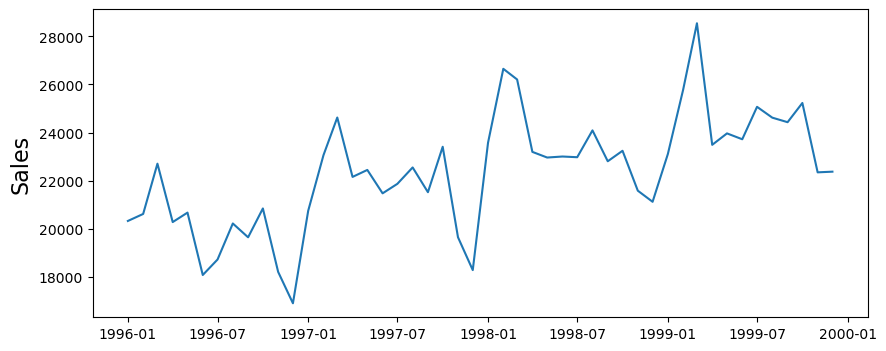

In [21]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Total'], label='Catfish Sales')
plt.ylabel('Sales', fontsize=16)

## Remove the trend

Text(0, 0.5, 'Sales')

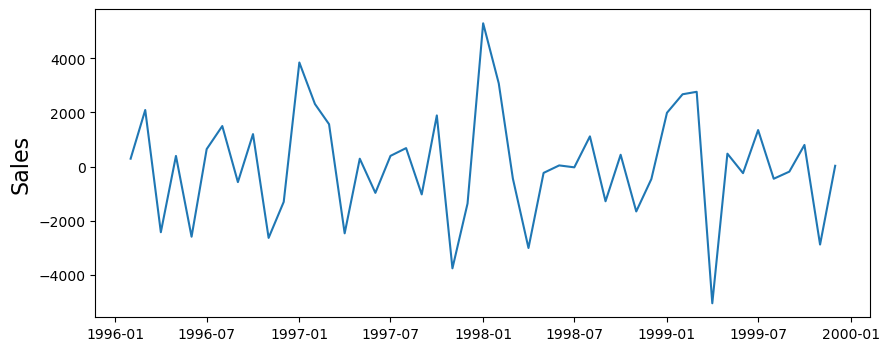

In [29]:
# add first difference in a seperate column
df['diff_1'] = df['Total'].diff()
df.dropna(inplace=True)
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['diff_1'], label='First Difference of Catfish Sales')
plt.ylabel('Sales', fontsize=16)


# ACF

<BarContainer object of 20 artists>

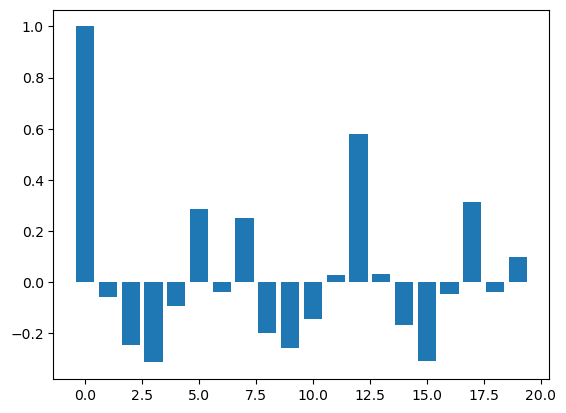

In [35]:
num_lags = 20
acf_vals = acf(df['diff_1'], nlags=20)
plt.bar(range(num_lags), acf_vals[:num_lags])

## Based on ACF, we should start with a seasonal MA process

# PACF

<BarContainer object of 20 artists>

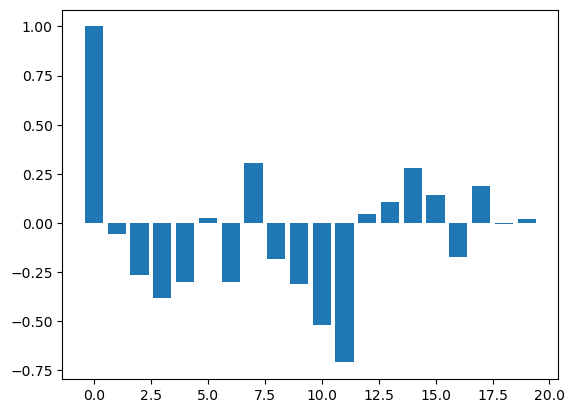

In [36]:
num_lags = 20
pacf_vals = pacf(df['diff_1'], nlags=num_lags, method='ols')
plt.bar(range(num_lags), pacf_vals[:num_lags])

## Based on PACF, we should start with a seasonal AR process

# Get training and testing sets

(40,)
(7,)


In [152]:
# Find Order
# https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html
Sarimax_model = auto_arima(train_data,
                       start_P=1,
                       start_q=1,
                       max_p=5,
                       max_q=5,
                       m=12,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=467.060, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=469.424, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=468.483, Time=0.04 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=467.730, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=467.145, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=468.757, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=468.541, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=469.228, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=469.016, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.953 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   40
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -232.530
Date:                            Sun, 14 Apr 2024   AIC                            467.060
Time:                                    15:24:55   BIC                            468.355
Sample:                                         0   HQIC                           467.445
                                             - 40                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.76e+06   4.22e+05      4.169      0.000    9.33e+05    2.59e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.31   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.13   Prob(JB):                         0.84
Heteroskedasticity (H):               5.99   Skew:                             0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
order = (0,1,0)
seasonal_order = (0, 1, 0, 12)
# define model
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)

In [154]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.011417865753173828


In [155]:
#summary of the model
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                   40
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -232.530
Date:                            Sun, 14 Apr 2024   AIC                            467.060
Time:                                    15:25:01   BIC                            468.355
Sample:                                         0   HQIC                           467.445
                                             - 40                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.76e+06   4.22e+05      4.169      0.000    9.33e+05    2.59e+06
Ljung-Box (L1) (Q):                

Text(0, 0.5, 'Error')

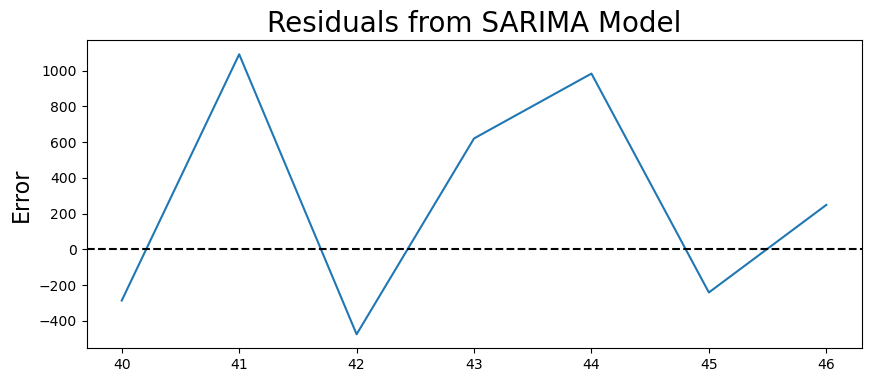

In [157]:
predictions = model_fit.forecast(len(test_data))
predictions 
#get the predictions and residuals
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions
residuals 

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)


Text(0, 0.5, 'Production')

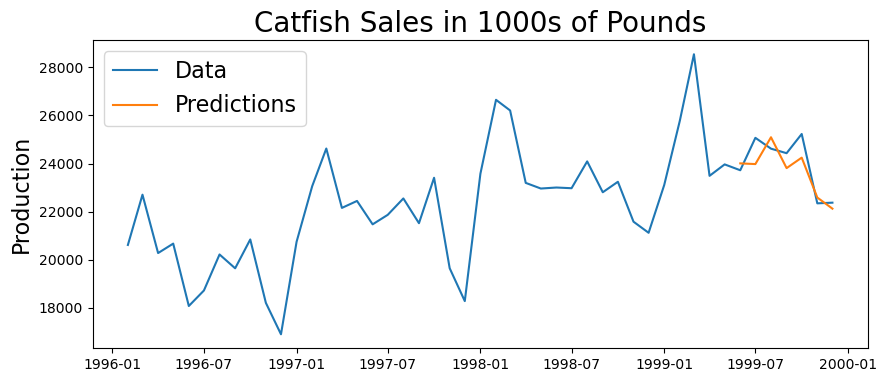

In [158]:
plt.figure(figsize=(10,4))

plt.plot(df['Date'], df['Total'], label='Data')
plt.plot(df[df['Date'] > train_end]['Date'],predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)


In [137]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.023


In [138]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 651.7957611750128


# Using the Rolling Forecast Origin

In [159]:
rolling_predictions = test_data.copy()
for train_end_index in test_data.index:
    train_data = df[:train_end_index]['Total']
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end_index] = pred

In [160]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

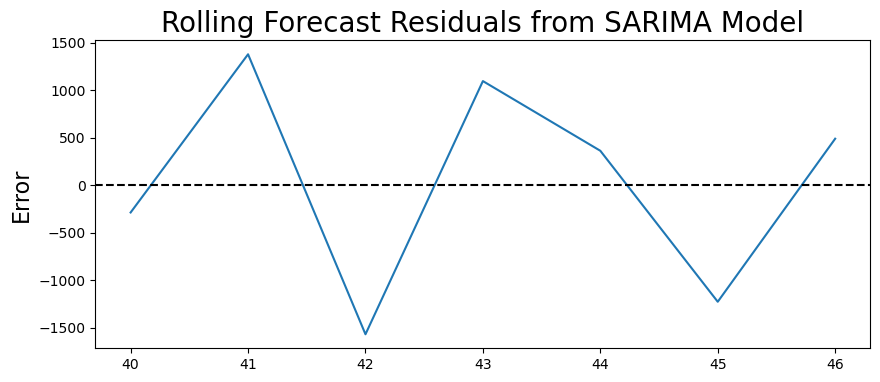

In [161]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [165]:
predictions

40    24006.0
41    23977.0
42    25093.0
43    23809.0
44    24245.0
45    22585.0
46    22123.0
Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Production')

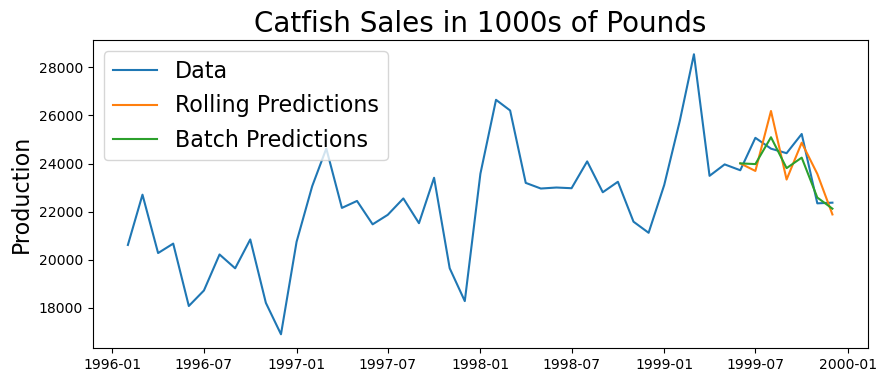

In [169]:
plt.figure(figsize=(10,4))

plt.plot(df['Date'], df['Total'], label='Data')
plt.plot(df[df['Date'] > train_end]['Date'],rolling_predictions, label='Rolling Predictions')
plt.plot(df[df['Date'] > train_end]['Date'],predictions, label='Batch Predictions')

plt.legend(('Data', 'Rolling Predictions', 'Batch Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)


In [170]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0381


In [171]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))



Root Mean Squared Error: 1035.7798304383307
